# Shopify Assessment

### Question 1] On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 


In [36]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data
data = pd.read_csv('shopify_data_set.csv')
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


 #### a] Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

AOV is $3145.13 is the mean of the order_amount

In [4]:
data['order_amount'].mean()

3145.128

To get more indepth summary of 'order_amount', I will use describe function

In [5]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

From the above table, it is clear that AOV of $3145.128 is because of some outliers. Since the standard deviation is of 41,282 and the min(90) and max(704,000) values have a huge difference. Similar can be showed with the help of density plot which clearly shows most order amounts lie below 50,000.

Density plot of Order amount shows that the plot is extremly right skewed with majority distribution lying in the starting range of order amount and few outliers having very high order amount values.

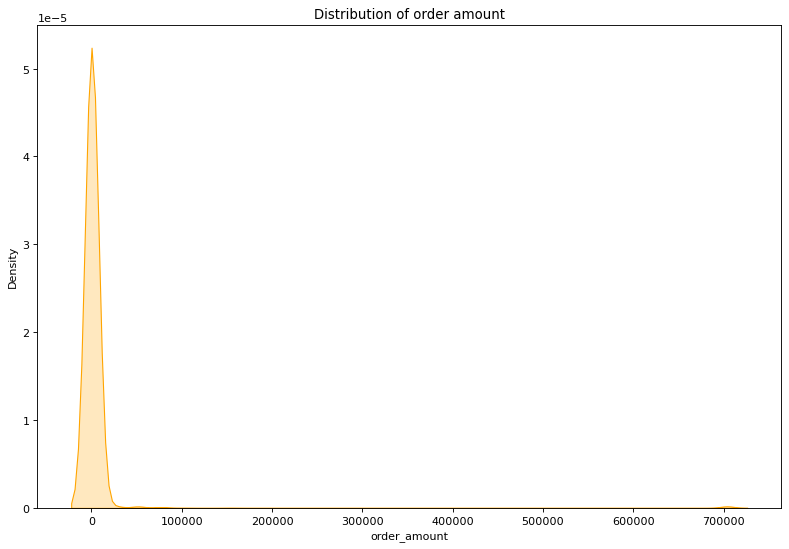

In [75]:
plt.figure(figsize=(12,8), dpi= 80)
sns.kdeplot(data['order_amount'], color='orange', fill=True)
plt.title('Distribution of order amount')
plt.show()

Calculating revenue generated by each shop

In [39]:
store_revenue= data.groupby('shop_id')['order_amount','total_items'].sum().reset_index()

In [40]:
store_revenue.sort_values('order_amount', ascending=False)

,shop_id,order_amount,total_items
41,42,11990176,34063
77,78,2263800,88
88,89,23128,118
80,81,22656,128
5,6,22627,121
...,...,...,...
1,2,9588,102
99,100,8547,77
55,56,8073,69
31,32,7979,79


As it can be seen shops 42 and 78 are generating highest revenue and shop 42 has very huge total item amount        
Displaying details of shop 42 and 78

##### Shop 42

In [37]:
data[data['shop_id']==42].groupby(['user_id','order_amount','total_items'])['order_amount','total_items'].count().head(10)

order_amount  total_items
user_id order_amount total_items                           
607     704000       2000                   17           17
720     704          2                       1            1
726     1056         3                       1            1
736     704          2                       1            1
739     352          1                       1            1
        704          2                       1            1
744     352          1                       1            1
747     704          2                       1            1
756     704          2                       1            1
770     352          1                       2            2

For shop id 42, we have user id 607 who has 17 times places order worth amount $704,000 consisting of 2000 items.   
My guess is that this user buys bulk items every time, diving deep to get used id 607 information.

In [43]:
data[data['user_id']==607].sort_values('created_at')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00


Here we can see the behaviour of user id 607, usual purchasing period 2-3 day, payment method is credit card etc. Hence our observation is correct

##### Shop 78

In [48]:
data[data['shop_id']==78].groupby('user_id')['order_amount','total_items'].mean().reset_index().sort_values(['order_amount'], ascending=False).head(10)

,user_id,order_amount,total_items
24,878,154350.0,6.0
17,834,102900.0,4.0
29,915,77175.0,3.0
6,766,77175.0,3.0
7,775,77175.0,3.0
8,787,77175.0,3.0
13,817,77175.0,3.0
14,818,77175.0,3.0
31,928,77175.0,3.0
37,962,77175.0,3.0


In [69]:
data[data['shop_id']==78]['order_amount'].mean()

49213.04347826087

similar trends can be observer for shop_id 78. Here the user base is equally distributed, but the avegage order_amount for each user id is very high $ 49,213.                                                               
Hence all the user id belonging to shop id 78 can be considered outliers.

### Removing Outliers

We can use 3 methods to discard the outliers                                                                      
method 1: using Inter quantile range                                                                         
method 2: removing data for shop id 42 & 78                                                                   
method 3: removing data for user id 607 and shop_id 78

#### method 1

In [56]:
q1 = data.order_amount.quantile(0.25)
q2 = data.order_amount.median()
q3 = data.order_amount.quantile(0.75)
iqr = q3-q1
data1=data.loc[(data['order_amount']>(q2-1.5*iqr))&(data['order_amount']<(q2+1.5*iqr))]

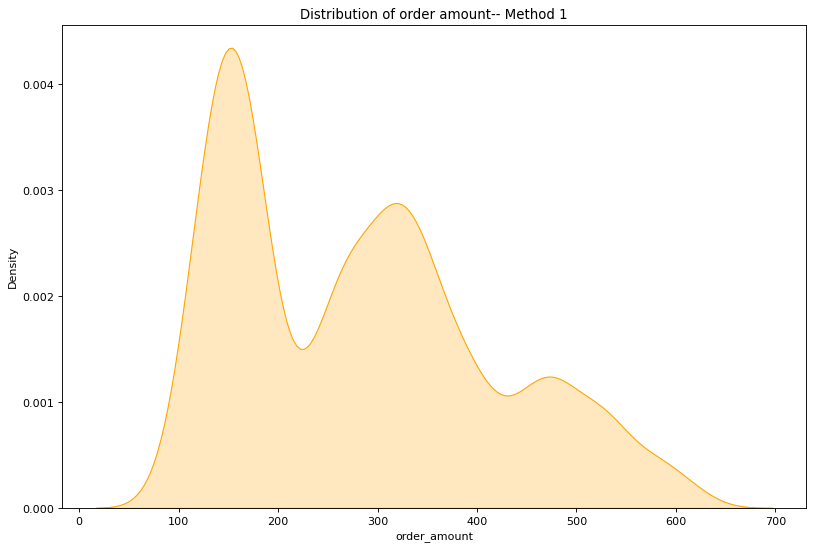

In [65]:
plt.figure(figsize=(12,8), dpi= 80)
sns.kdeplot(data1['order_amount'], color='orange', fill=True)
plt.title('Distribution of order amount-- Method 1')
plt.show()

#### method 2

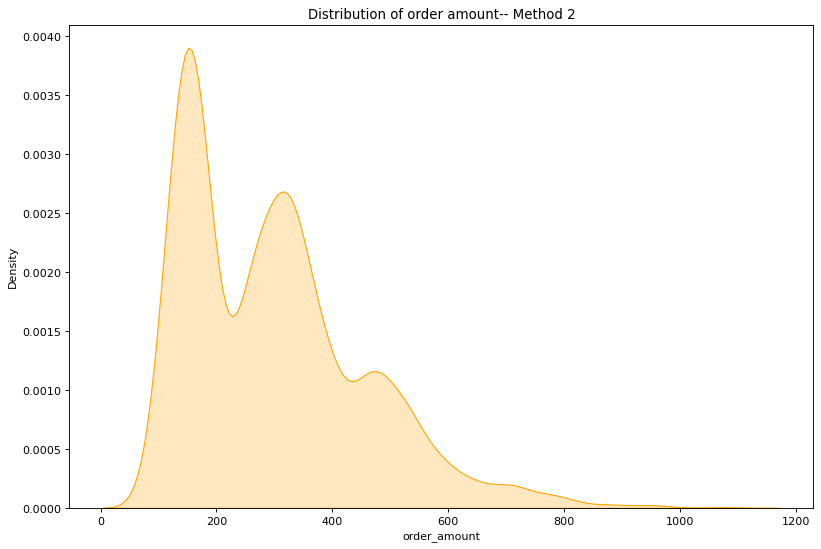

In [70]:
data2 = data[(data['shop_id']!=42) & (data['shop_id']!=78)]
plt.figure(figsize=(12,8), dpi= 80)
sns.kdeplot(data2['order_amount'], color='orange', fill=True)
plt.title('Distribution of order amount-- Method 2')
plt.show()

#### method 3

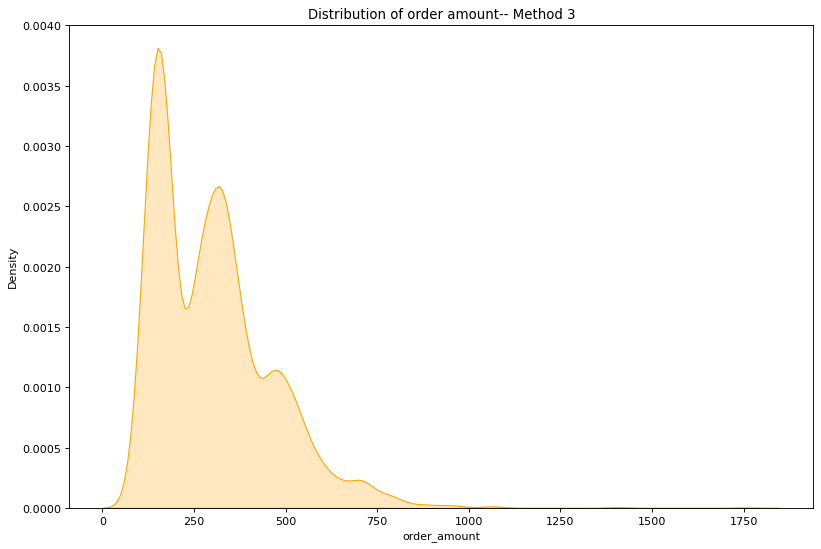

In [71]:
data3 = data[(data['user_id']!=607) & (data['shop_id']!=78)]
plt.figure(figsize=(12,8), dpi= 80)
sns.kdeplot(data3['order_amount'], color='orange', fill=True)
plt.title('Distribution of order amount-- Method 3')
plt.show()

From all the 3 Methods plots, method 1 has the most normally distributed plot with least outliers and without considerably reducing the size of the dataset. Hence using data1 is the best option.

#### b] What metric would you report for this dataset?

In [72]:
data1.order_amount.describe()

count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64

In [74]:
data1.order_amount.median()

272.0

As data1 is slightly right skewed, I would use median instead on mean value. Since mean value tends to get affected by outliers.                                                                                                

#### C] What is its value?

Median = $272

### Question 2] For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.


#### a] How many orders were shipped by Speedy Express in total?

SELECT count(*) as Speedy_Express_order_count                                                                      
FROM Orders as o                                                                                                  
join Shippers as s                                                                                                 
on o.ShipperID = s.ShipperID                                                                                       
where s.ShipperName = 'Speedy Express';                                                                           

Speedy_Express_order_count = 54

#### b] What is the last name of the employee with the most orders?

select LastName from Employees                                                                                    
where EmployeeID in (select EmployeeID from                                                                        
(SELECT EmployeeID,count(EmployeeID) as count                                                                      
FROM Orders                                                                                                        
group by EmployeeID                                                                                                
order by count Desc                                                                                               
Limit 1));

LastName = Peacock

#### c] What product was ordered the most by customers in Germany?

Select ProductName from Products                                                                                  
where ProductId =(Select ProductId from(Select od.ProductID,sum(od.Quantity) as tot_Quantity                       
from Customers as c                                                                                             
join Orders as o                                                                                                
on c.CustomerID=o.CustomerId                                                                                     
join OrderDetails as od                                                                                          
on o.OrderID=od.OrderID                                                                                        
join Products as p                                                                                               
on od.ProductID=p.ProductID
where c.Country = 'Germany'                                                                                        
group by od.ProductID                                                                                          
order by tot_Quantity Desc                                                                                       
limit 1));                               

ProductName=Boston Crab Meat